In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [55]:
np.random.seed(42)

In [56]:
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]

mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]

mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]

mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]


In [57]:
data1 = np.random.multivariate_normal(mu1, sigma1, 100)
data2 = np.random.multivariate_normal(mu2, sigma2, 100)
data3 = np.random.multivariate_normal(mu3, sigma3, 100)
data4 = np.random.multivariate_normal(mu4, sigma4, 100)

In [58]:
synthetic_data = np.vstack((data1, data2, data3, data4))

In [59]:
synthetic_data.shape

(400, 2)

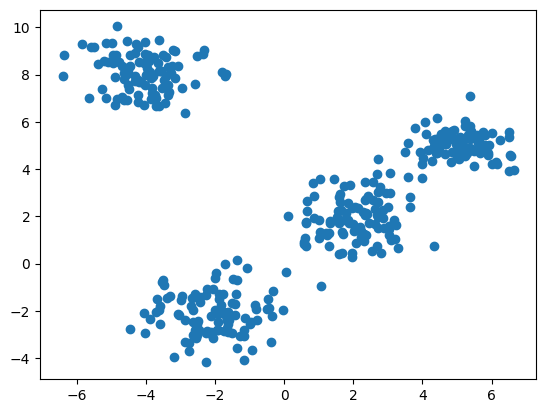

In [60]:
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([<matplotlib.axis.XTick at 0x7e4069789f60>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

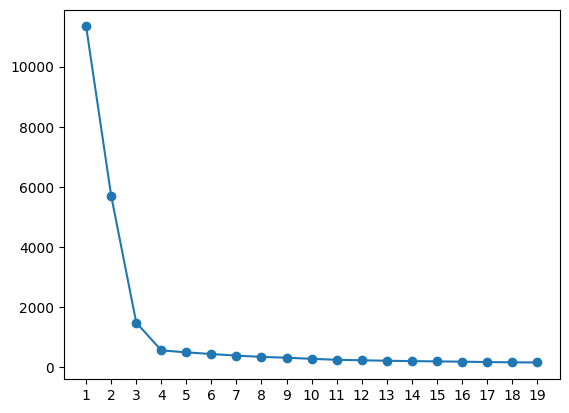

In [61]:
wcss = []
for k in range(1,20):
  kmeans = KMeans(n_clusters = k, random_state=0)
  kmeans.fit(synthetic_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss, marker='o')
plt.xticks(np.arange(1,20,1))

In [62]:
kl = KneeLocator(range(1, 20), wcss, curve="convex", direction="decreasing")
kl.elbow

4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


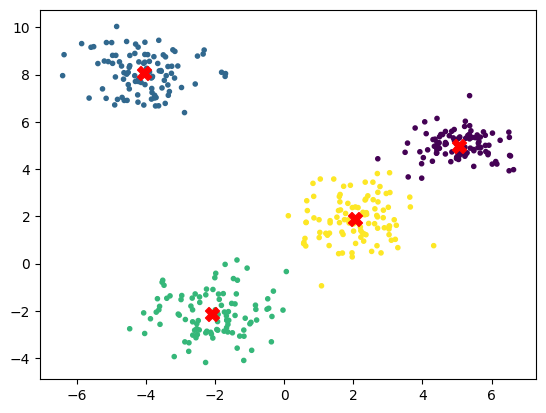

In [63]:
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(synthetic_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], c=labels, cmap='viridis', marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s = 100, label='Centroids' )
plt.show()